# Introduction to Data Science
## Homework 3

Student Name: Arfan Shah

Student Netid:
***

### Part 1 - Preparing a Training Set and Training a Decision Tree (Total 10 Points)
This is a hands-on task where we build a predictive model using Decision Trees. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the dataset's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is to split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function from numpy but do not use the data splitting functions from Sklearn.<br><br>

(2 Points)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

dataset = pd.read_csv('/home/uca/Desktop/UCA_Undergrad/8th Semester/Data Science/cell2cell_data.csv')

x = dataset.iloc[:, : -1].values
y = dataset.iloc[:, -1].values

index = np.random.rand(len(dataset)) <= 0.8
train_df = dataset[index]
test_df = dataset[~index]


In [10]:
#preprocessing (missingg data + date column drop as it is not affecting predicted variable) + instances+ refernces + which and why algorithms
train_x =  dataset.iloc[:, : -1].values
train_y = dataset.iloc[:, -1].values

2\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

(1 Point)

In [22]:
from sklearn.tree import DecisionTreeClassifier
training_features = train_df.iloc[:, : -1]
training_target = train_df.iloc[:, -1]
classifer = DecisionTreeClassifier(criterion='entropy', random_state=0)
trainedData = classifer.fit(train_x, train_y)

3\. Using the resulting model from 2.2, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

(3 Points)

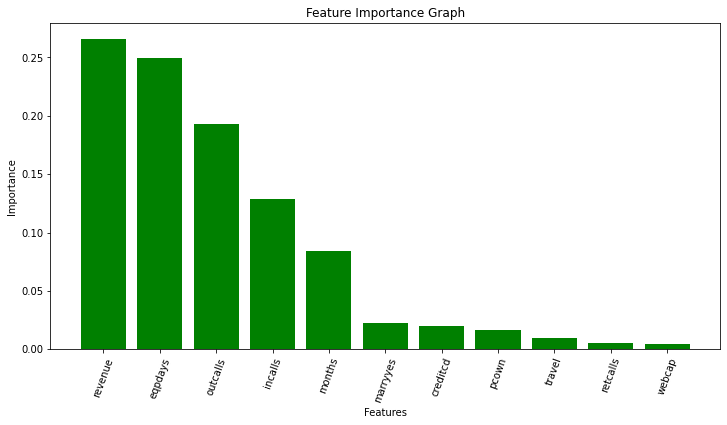

In [31]:
x_length = np.arange(len(list(training_features)))
names = list(training_features)
importance = pd.DataFrame({"Features":list(training_features),"Importance":trainedData.feature_importances_})
importance.sort_values(by = 'Importance',ascending = False,inplace = True)

plt.figure(figsize = (12,6))
plt.title("Feature Importance Graph")

plt.bar(x_length,importance["Importance"],align="center",color="green")
plt.xticks(x_length,importance["Features"],rotation="70")
plt.xlabel('Features')
plt.ylabel('Importance')

plt.show()

4\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

(2 Points)

In [33]:
columns = list(dataset[importance[:3]["Features"]])
columns.extend(["churndep"])
dataset[columns].corr()

,revenue,eqpdays,outcalls,churndep
revenue,1.000000,-0.222074,0.500709,-0.013370
eqpdays,-0.222074,1.000000,-0.244112,0.112821
outcalls,0.500709,-0.244112,1.000000,-0.037071
churndep,-0.013370,0.112821,-0.037071,1.000000


<p>
<span style="color:blue">
Top three features are revenue, eqpdays, and outcalls.
    Revenue and Eqpdays have a negative relationship. This means that as revenue rises somewhat, eqpdays fall. This type of relationship is weak. We may deduce that the company's revenues will increase marginally if the client stops using the current equipment and starts using the new, company-provided equipment.
    
    With moderate strength, revenue and outcalls are positively connected. This means that when a customer's quantity of outgoing calls grows, so does the company's revenue.
    
    The link between eqpdays and outcalls is poor. We may deduce that when the number of outgoing calls from consumers grows, the eqpdays, or the number of days the customer has their present equipment, decreases slightly. Customers that make more outgoing calls are more inclined to purchase new equipment from the company rather than continue to utilize their old equipment.
    
Monthly revenue (revenue), the number of days a client has had his or her current equipment (eqpdays), and the average number of outbound voice calls are the top three factors that influence churn.
    
    The less likely they are to churn as our revenue per client increases, i.e. the more they pay, the less likely they are to churn. This can be ascribed to customers being satisfied with our services and voluntarily using more of them. Although, revenue has a minor and minimal impact on churn.
    
    Our clients are more likely to churn the longer they utilize their current equipment. In order to lock-in the client and increase customer stickiness, we must ensure that the consumer acquires equipments from us.
    
    The more outgoing calls our clients make, the less likely they are to churn. More outbound calls suggest that our services are being used successfully and willingly. Customers who are satisfied are less likely to leave. This relationship, like revenue, is weak and nearly non-existent.
    
</span>
</p>

5\. Using the classifier built in 2.2, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each? Remember: accuracy is the fraction of predictions whose labels were gotten right by the model. What conclusions can you derive from this?

(2 Points)

In [34]:
# Splitting test dataset into target and features
testing_features = test_df.iloc[:, : -1]
testing_target = test_df.iloc[:, -1]

#  Predicting target for train and test dataset
test_result = trainedData.predict(testing_features)
train_result = trainedData.predict(training_features)

test_accuracy = accuracy_score(testing_target,test_result)
train_accuracy=accuracy_score(training_target,train_result)
print("Accuracy for the testing dataset is %.4f%% and accuracy for the training dataset is %.4f%%" %(test_accuracy*100,train_accuracy*100))

Accuracy for the test dataset is 99.987% and accuracy for the training dataset is 99.978%


/home/uca/.local/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/uca/.local/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


### Part 2 - Finding a Good Decision Tree (Total 10 Points)
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters min_samples_split and min_samples_leaf. 

(1 Point)

In [36]:
splits = np.arange(10,1000,100)
leafnodes = np.arange(10,1000,100)

2\. Explain what your reasoning was for choosing the above ranges.

(1 Points)

<p>
<span style="color:blue">
We increase min samples split because the default value of 2 is too low and causes our model to overfit on the training data. We choose greater numbers since the data set is too huge.
    
We choose a higher min_samples_leaf as the default value of 1 is too low. However, we don't want the value to be too high as it can result in the model to demonstrate low variance and high bias.
    
For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of min_samples_split as the x-axis and generate a new series (line) for each of min_samples_leaf.
</span>
</p>

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

(5 Points)

Optimal Sample Split Size is 910 and Optimal Leaf Samples are 210.And best accuracy is 59.2867%


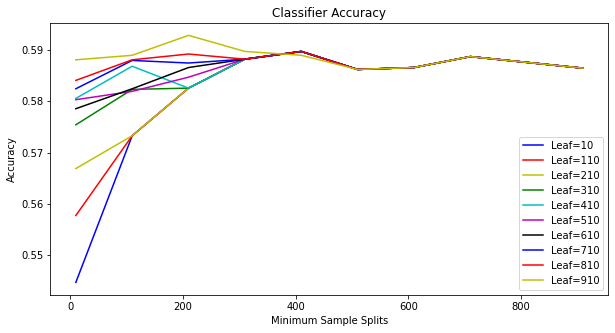

In [43]:
def DtreeIter(train_features,train_target,test_features,test_target,samplesplit,sampleleaf):
    treeOpt=DecisionTreeClassifier(criterion="entropy",min_samples_split=samplesplit,min_samples_leaf=sampleleaf)
    treeOpt=treeOpt.fit(train_features,train_target)
    result_Opt=treeOpt.predict(test_features)
    return accuracy_score(test_target,result_Opt)

result_optimise=dict()
for values in splits:
    result_optimise[values]=list()

for values in splits:
    for nodes in leafnodes:
        result_optimise[values].append([DtreeIter(training_features,training_target,testing_features,testing_target,values,nodes)])

      
        
#To find out best parameters        
optimal_split=max(result_optimise, key=lambda x: result_optimise[x][1])
optimal_accuracy=max(result_optimise[optimal_split])
optimal_leaf=leafnodes[list(result_optimise[optimal_split]).index(optimal_accuracy)]
print("Optimal Sample Split Size is %d and Optimal Leaf Samples are %d.And best accuracy is %.4f%%" %(optimal_split,optimal_leaf,optimal_accuracy[0]*100))


plt.figure(figsize=(10,5))
plt.plot(splits,result_optimise[leafnodes[0]],'b',label='Leaf={}'.format(leafnodes[0]))
plt.plot(splits,result_optimise[leafnodes[1]],'r',label='Leaf={}'.format(leafnodes[1]))
plt.plot(splits,result_optimise[leafnodes[2]],'y',label='Leaf={}'.format(leafnodes[2]))
plt.plot(splits,result_optimise[leafnodes[3]],'g',label='Leaf={}'.format(leafnodes[3]))
plt.plot(splits,result_optimise[leafnodes[4]],'c',label='Leaf={}'.format(leafnodes[4]))
plt.plot(splits,result_optimise[leafnodes[5]],'m',label='Leaf={}'.format(leafnodes[5]))
plt.plot(splits,result_optimise[leafnodes[6]],'k',label='Leaf={}'.format(leafnodes[6]))
plt.plot(splits,result_optimise[leafnodes[7]],'b',label='Leaf={}'.format(leafnodes[7]))
plt.plot(splits,result_optimise[leafnodes[8]],'r',label='Leaf={}'.format(leafnodes[8]))
plt.plot(splits,result_optimise[leafnodes[9]],'y',label='Leaf={}'.format(leafnodes[9]))
plt.legend(loc=4)
plt.xlabel('Minimum Sample Splits')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy')
plt.show()

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

(1 Point)

<p>
<span style="color:blue">
If we set the Sample Split size to 910 and the Optimal Leaf Samples to 210, we get the best accuracy of 59.2867% This accuracy represents the percentage of times our model predicts the correct output. Values predicted by the model are compared with actual value in the test data set to determine this metric.
</span>
</p>

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

(2 Points)

<p>
<span style="color:blue">
Churn prediction is a critical activity for every business. Churn in the marketing sector might include both high-performing salespeople and customers.

By analysing customer churn, a company can take reasonable steps to retain the existing customer. Losing a customer will not only cost the company in lost revenue, but the company will also incur additional cost to bring in a new customer which often results in higher costs due to extra advertising or onboarding benefits. Customer acquisition is 5-40 times more expensive than customer retention and it makes economic sense for the company to keep existing customers happy. Doing so may also result in an increase in profits due to increased engagement with customers.

Because the salesman is frequently the face of the firm during negotiations, a company can retain its high-performing personnel by analyzing employee churn and compensating them with bonuses and rewards. The loss of a high-performing employee will result in a decline in revenue, as well as a shift in loyalty among existing customers linked with that salesperson.
    
By referring to the churn prediction model, the company can take decisive steps to pursue its employees and customers.
    Example: A model-identified consumer may be rewarded with a free discount voucher, a free trial of an exclusive service, or other industry-relevant and personally satisfying offerings. As a result, the client may feel more connected to the company, which may lead to increased use of associated products and services.
    
    Example: To improve the employee's association with the company, a high-performing salesman identified by the model can be rewarded with a free vacation package, a free phone, or more personally satisfying products and services.
</span>
</p>

### Part 3: Model selection with cross-validation (Optional)
In this part, we will focus on cross-validation to find a good value for parameter `max_depth`.


1\. Write a cross-validation function that does the following:
- Takes as inputs a dataset, a label name, # of splits/folds (`k`), and a sequence of values for the maximum depth of the tree (`max_depth`). 
- Shuffles the data.
- Splits the data into `k` folds according to the cross-validation logic
- Performs two loops
  - Outer Loop: `for each f in range(k)`:
    - Inner Loop: `for each value in max_depth_sequence`:
      - Trains a Decision Tree on the training split with the `max_depth=value` (USE criterion='entropy' BUT DO NOT ALTER THE OTHER PARAMETERS)
      - Computes accuracy_value_f on test split
      - Stores accuracy_value_f in a  dictionary of values
- Returns a dictionary, where each key-value pair is: `value:[accuracy_value_1,...,accuracy_value_k]`

(2 Points)

In [4]:
#Place your code here
#Uncomment line below
#def xValDecisionTree(dataset, label_name, k, max_depth_sequence):

2\. Using the function written above, do the following:
- Generate a sequence `max_depth_sequence = [None, 2, 4, 8, 16, 32, 128, 256, 512]` (Note that None is the default value for this parameter).
2.	Call accs = xValDecisionTree(dataset, 'churndep', 10, `max_depth_sequence`)
3.  For each value in accs.keys(), calculate mean(accs[value]). What value is associated with the highest accuracy mean?
4.  For each value in accs.keys(), calculate the ranges mean(accs[value]) +/- std(accs[value]). Do the ranges associated with the value that has the highest mean(accs[value]) overlap with ranges for other values? What may this suggest and what are the limitations of a standard deviation based analysis in this scenario?

5.  Which depth value would you pick, if any, and why?

(3 Points)

In [5]:
#Place your code and answers here. You can create more cells if you want.